# 	Fast Deterministic CUR Matrix Decomposition

## Team members

- **Kuzmina Ekaterina** - Project management, Deterministic CUR algorithms implementation (first and second algorithms), Implementation of CUR decomposition for EEG, Presentation design, Video editing

- **Dmitrii Krukov** - Deterministic CUR algorithms implementation (first and second algorithms), Application of CUR with genes, help with testing

- **Dmitrii Gromyko** - Stochastic CUR implementation, Tests of convergence, Time costs comparison of the algorithms, Tests of algorithm's behaviour with different matrices

- **Ilya Barskiy** - SVD and CUR comparison,  Implementation of CUR decomposition for EEG, Conclusion and comparison of algorithm's behaviour with different matrices

## Why do we need matrix decomposition like SVD and CUR

As we all know, in real world we have to deal with enormous matrices. It could be a problem. So that’s when we might be a little smarter and decompose and compress our data. For example, we can use one of such algorithm - Singular Value Decomposition in Feature extraction in machine learning and Data Compression.
The usage of CUR decomposition is almost the same. We can use it in Model reduction, Speedup of computations in numerical analysis, Matrix factorization. It might seem that CUR and SVD are the same. However, they have very fundamental differences, holding on which, we should choose one method over the other in some special situation.


## CUR Decomposition

So, what is **CUR** Decomposition?
CUR is one of the data compression methods. CUR is divided into 3 matrices, C, U, and R. 
- C and R are subsets of c columns and r rows of the original data matrix, respectively.

- U is inverse matrix at their intersection


The other name of this decomposition is *Skeleton*, it is rarely used in articles.


This decomposition has been a popular method in some science areas due to its high interpretability. This is because the decomposed matrices represent the initial matrix, but without excess data. So, in other words, we keep the original information (for example, in SVD we recieve unitary non-original matrices) and get rid of columns and rows, that does not bring in important information.


##  Idea of Deterministic CUR. Idea of Fast CUR

Firslty, let's look onto deterministic CUR matrix decomposition. The main idea is to approach to the problem as it is a low-rank approximation. And use this method to analyze a data matrix. As it was already mentioned, this method is widely used and popular due to its high interpretability, which results from the fact that the decomposed matrices consist of subsets of the original columns and rows of the original data matrix.

The matrices C and R are obtained by using coordinate descent and with help of it optimize an objective function with sparsity-inducing norms. Nevertheless, the usual algorithms for optimization are high in computation costs, since we have many steps for computation and, for instance, coordinate descent updates all the parameters in the objective iteratively until convergence. The article, which was used for our project proposes slightly differ algorithm for CUR decomposition, called **Fast deterministic CUR matrix decomposition**. This algorithm evaluates the optimality conditions and safely skips unnecessary updates for the zeros parameters. So, we find  rows and columns whose parameters must be zeros at linear time with respect to the number of columns or rows by approximately evaluating the optimality conditions for the parameters to be zeros (1 algorithm). 

In the second algorithm, we preferentially update the parameters that must be nonzeros. Because these nonzero parameters would correspond to the important columns and rows for the construction of the decomposed matrices, our algorithm
is expected to effectively optimize the objective function.

Similarly, the first algorithm can identify the columns and rows whose parameters must be nonzeros at linear time.

Also, the computational cost can be reduced, because this algorithms does not have any additional hyperparameters, which can increase algorithms computational cost in the tuning stage.

In theory, this method will give the same result as the original method, but by going slightly other way.

## Idea and math of Stochastic CUR

Additionally, we implement and make experiments with the **Stochastic CUR matrix decomposition** method. 

Stochastic CUR
The idea behind stochastic approach is to compute "importance score" for each column and row and then choose a meaningfully small number of them with probability proportional to this score/ This score should show what columns have lagrer impact on the best low-rank fit, instead of columns with larger Euclidean norm or empirical varience. That is why this score should be based on Singular Value Approximation due to the well-known feature of SVD best possible low-rank approximation.

The derivation starts from direct application of SVD to columns of a given matrix A with rank r:
$$A^{j}=\sum_{\xi=1}^{r}\left(\sigma_{\xi} u^{\xi}\right) v_{j}^{\xi}$$

Note that the j-th column of $A$ is a linear combination
of all the left singular vectors and singular values, and
the elements of the jth row of V are the coefficients. Thus, one can
approximate $A^j$ as a linear combination of the top k left singular
vectors and corresponding singular values as
$$A^{j}=\sum_{\xi=1}^{k}\left(\sigma_{\xi} u^{\xi}\right) v_{j}^{\xi}$$
We seek columns of $A$ that are simultaneously correlated
with the span of all top k right singular vectors, we then compute
the normalized statistical leverage scores:
$$
\pi_{j}=\frac{1}{k} \sum_{\xi=1}^{k}\left(v_{j}^{\xi}\right)^{2}
$$
Now the standart proceedure for the columns selection is straightforward:
1. Compute v1, . . . , vk (the top k right singular vectors of A)
and the normalized statistical leverage scores.
2. Keep the jth column of $A$ with probability pj = min{1, $cπ_j$},
for all j ∈ {1, . . . , n}, where $c = O(k \log k/\epsilon^2)$.
3. Return the matrix C consisting of the selected columns
of A.
4. Repeat for the matrix $A^T$ to select rows and construct the matrix R.
5. Define the matrix $U$ as $U=C^+AR^+$, where superscript + denotes pseudoinverse operation.

The time required for this algorithm is dominated by calculation of the leverage scores. Authors of the proposed algorithm claim that the error estimation 
$$
\|A-CUR\|_F\le(2+\epsilon)\|A-A_k\|_F
$$
holds true with a 98% probability.

## Math behind Deterministic CUR

As it was said, CUR Decomposition is a low-rank approximation to a initial matrix with data $X \in R^{n \times p}$. So, we decompose $X$ into three matrices $C, U$ and $R$. 

This decomposition give us this three matrices out of initial matrix $X$. For example, the related to CUR - Singular Value Decomposition (SVD) extracts other matrixes. Exactly this feature makes CUR Decomposition very interpretable and convinient for experiments.

$C \in R^{n \times c}, U \in R^{c \times r}$ and $R \in R^{r \times p}$. As we can see, $C$ and $R$ are submatrices of $c$ colums and $r$ rows of the original matrix $X$. 

The selection of $C$ and $R$ matrices can be represented as sparce optimization approach. To be more precise, a convex optimization problem with sparsity-inducing norms.

To select $C$ submatrix we define problem as: 

$$
\min _{\mathbf{W} \in \mathbb{R}^{p \times_{p}}} \frac{1}{2}\|\mathbf{X}-\mathbf{X} \mathbf{W}\|_{F}^{2}+\lambda \sum_{i=1}^{p}\left\|\mathbf{W}_{(i)}\right\|_{2}
(1)$$  

Here $W \in R^{p \times p}$ is a matrix of parameters (weights). The regularization constant $\lambda \geq 0$.
The degree of sparsity of the parameter matrix $W$ can be controled via a regularization constant $\lambda$. If we get, that $W_{(i)} = 0$ (zero vector), the corresponding column of initial matrix $X$ is unimportant for our data and can be thrown away. Therefore, we have to choose all corresponding columns in $X$ that are not zero in $C$. Also, we can extrapolate this problem for a search of rows for $R$ submatrix and select $C$ and $R$ simultaneously. 


### Coordinate Descent

(1) equation can be solved via coordinate descent. The idea is to iteratively updates each weight vector $W_{(i)}$ in matrix $W$ until matrix converges. Firstly, we have to normalize $X$. If we miss this step, the algorithm will have problems with convergence and will work improperly.

$||X^{(i)}||_{2} = 1$

Then, we can update $W_{(i)}$ via :

$$
\mathbf{W}_{(i)}=\left(1-\lambda /\left\|\mathbf{z}_{i}\right\|_{2}\right)_{+} \mathbf{z}_{i} (2)     
$$

where (3)
$$
\left(1-\lambda /\left\|\mathbf{z}_{i}\right\|_{2}\right)_{+}=\left\{\begin{array}{ll}
1-\lambda /\left\|\mathbf{z}_{i}\right\|_{2}, & \text { if } 1-\lambda /\left\|\mathbf{z}_{i}\right\|_{2}>0 \\
0, & \text { otherwise }
\end{array}\right. 
$$

We can compute $z_i \in R^{1 \times p}$:

$$\mathbf{z}_{i}=\mathbf{X}^{(i) \mathrm{T}}\left(\mathbf{X}-\sum_{j \neq i}^{p} \mathbf{X}^{(j)} \mathbf{W}_{(j)}\right) (4)$$



### Fast CUR

We can speedup coordinate descent by skipping the computations for the unimportant rows of $W$, the ones that are equal zero in equation (2). Since we already know, that this columns\rows are do not have interesting for us information.

So, we have to define, which rows of $W$ we can ignore. To do that, we approximately evaluate the optimality conditions for the parameter vectors to be zero vectors. In other words, we compute the **upper bounds** of the optimality condition scores instead of the exact scores. This requires less computational resources and can be done in $O(p^2) or O(pn) time.$

The upper bound computation requires $O(p)$ time and we make coordinate descent much faster.

The other idea is to preferentially update the parameter vectors $W_{(i)}$ that must be nonzero vectors. This way the algorithm will effectively
optimize the objective by intensively updating the parameter vectors.We utilize the lower bounds of the optimality condition scores for the parameter vectors to be zero vectors to identify such parameter vectors.
The computational cost for that is also $O(p) time$.




### Approximations of Optimality Condition Score

The **upper** and **lower bounds** are used to identify the parameter vectors that must be zero vectors and nonzero vectors at the optimal solutions,  respectively.

So, let $\bar{K}_{i}$ and $\underline{K_{i}}$ be the upper and lower bounds of the optimality condition score $K_{(i)}$. 


$$
\bar{K}_{i}=\tilde{K}_{i}+\left\|\Delta \boldsymbol{W}_{(i)}\left\|_{2}+\delta\right\| \boldsymbol{G}_{(i)} \right\|_{2} \rightarrow O(p) \text{ time}
$$
where
$$
\delta=\sqrt{\|\Delta W\|_{F}^{2}-\left\|\Delta W_{(j)}\right\|_{2}^{2}+\left\|\Delta W_{(j)}^{\prime}\right\|_{2}^{2}}
$$
When $\bar{K}_{i} \leq \lambda$, $W_{(i)}=0$ for the i-th row vector.
$$
\underline{K_{i}}=\bar{K}_{i}-2\left\|\Delta \boldsymbol{W}_{(i)}\right\|_{2}-2 \delta \| \boldsymbol{G}_{(i)} \|_{2} \rightarrow O(1) \text{ time}
$$
When $\underline{K}_{i}>\lambda$, $W_{(i)} \neq 0$ for the i-th row vector.




## Tests and Experiments

### Tests with Radial Basis Function matrix

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#RBF matrix for R+
N = 50
xi = np.array([i/(N-1) for i in range(N)])
xj = np.array([i/(N-1) for i in range(N)])
xx, yy = np.meshgrid(xi, xj)
A_rbf = np.exp(-np.sqrt(xx**2 + yy**2))

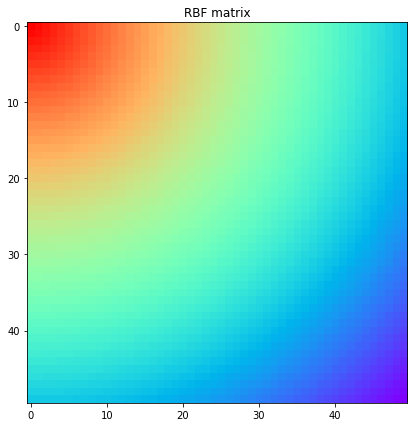

In [5]:
plt.figure(figsize=(15,7))
plt.imshow(np.log(A_rbf), cmap='rainbow')
plt.title('RBF matrix')
plt.show()

We plot the dependence of approximation quality (number of columns and rows and realtive error in Frobenius norm) as a function of parameter $\lambda$. We vary the parameter $\lambda$ in Deterministic CUR.

$\lambda$ is the parameter to control the number of rows and columns used in the approximation.
$$
\min _{\mathbf{W} \in \mathbb{R}^{p \times_{p}}} \frac{1}{2}\|\mathbf{X}-\mathbf{X} \mathbf{W}\|_{F}^{2}+\lambda \sum_{i=1}^{p}\left\|\mathbf{W}_{(i)}\right\|_{2}
$$
The regularization constant $\lambda$ controls the degree of sparsity of the parameter matrix W. If $W_{(i)}$ is a zero vector, the corresponding
column of the data matrix $X^{(i)}$ can be considered as an
unimportant column for the problem.

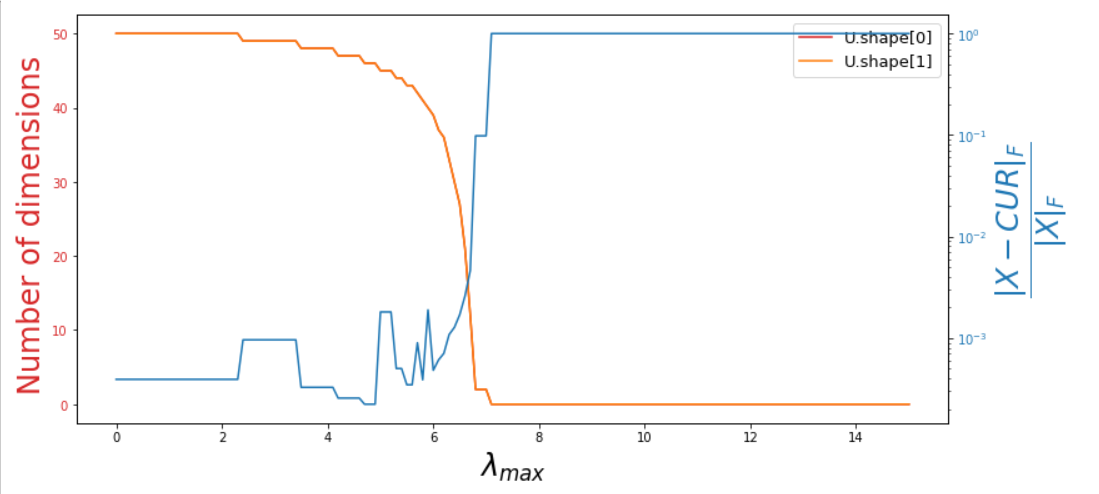

Here we compare deterministic CUR algorithm approximation with SVD low-rank approximation.

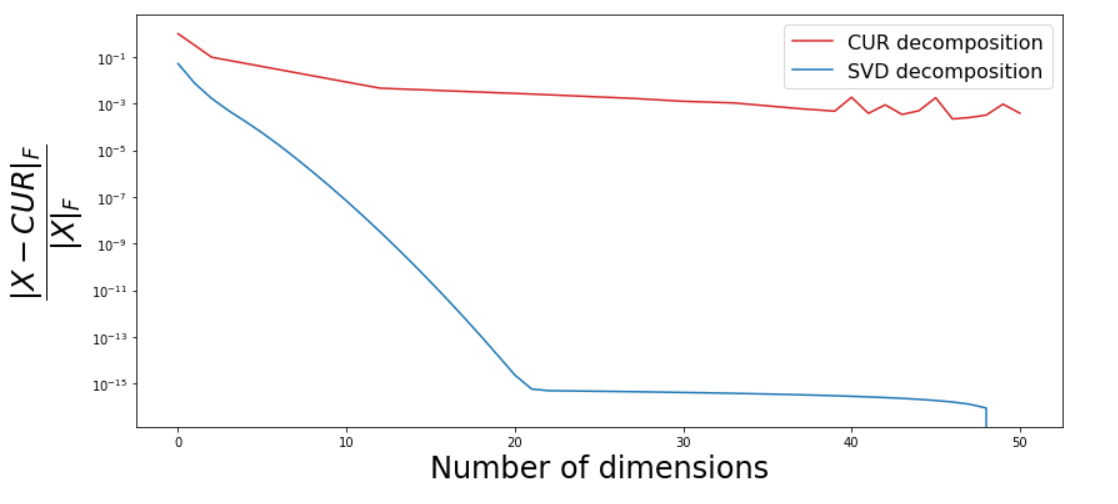

Here we perform the same analysis for RBF matrix, but use the stochastic CUR algorithm instead of deterministic one. We choose the parameter k equal to 10 and change $\epsilon$ in a wide range. Also for each pair of parameters we calculate 10 iterations and choose one corresponding to the best relative error. Note that the minimal relative error over the whole $\epsilon$ range is approximately equal to the rank k=10 SVD approximation error. 

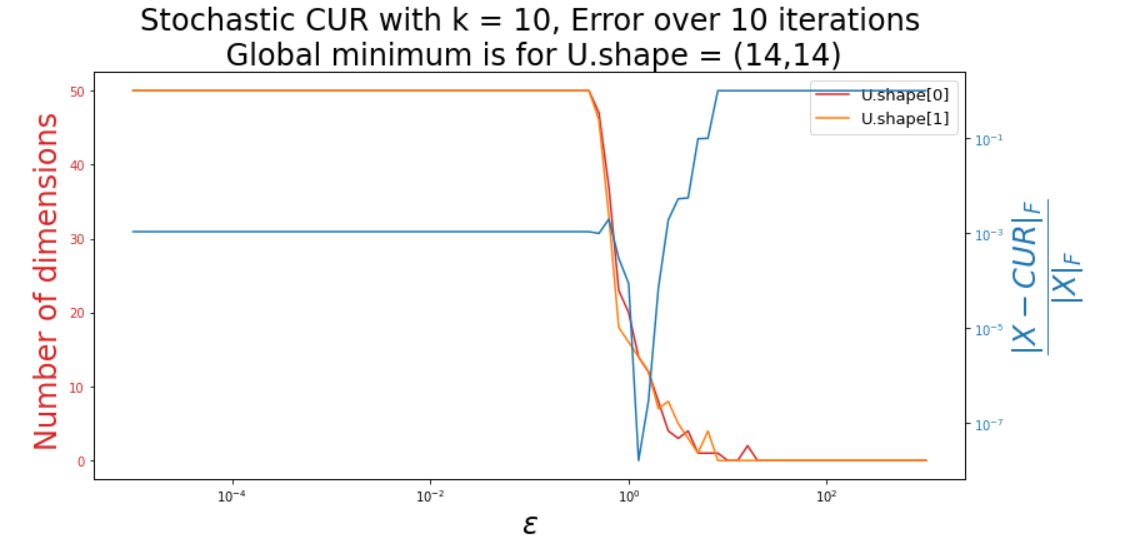

We compare the quality of approximation with SVD. Note that when dimension is equal to 50, i.e. the full matrix is taken into consideration and no low-rank approximation is performed, realtive error is the same as for deterministic CUR. It is not equal to machine precision because RBF matrix is quite close to singular and pseudoinverse function works not that good. On the contrary, when one chooses to work with $\approx$ 15 columns and rows, relative error is sufficiently small. Comparison with deterministic CUR shows that for the RBF matrix combination of SVD-based weights and randomness of choice leads to better column selection. 

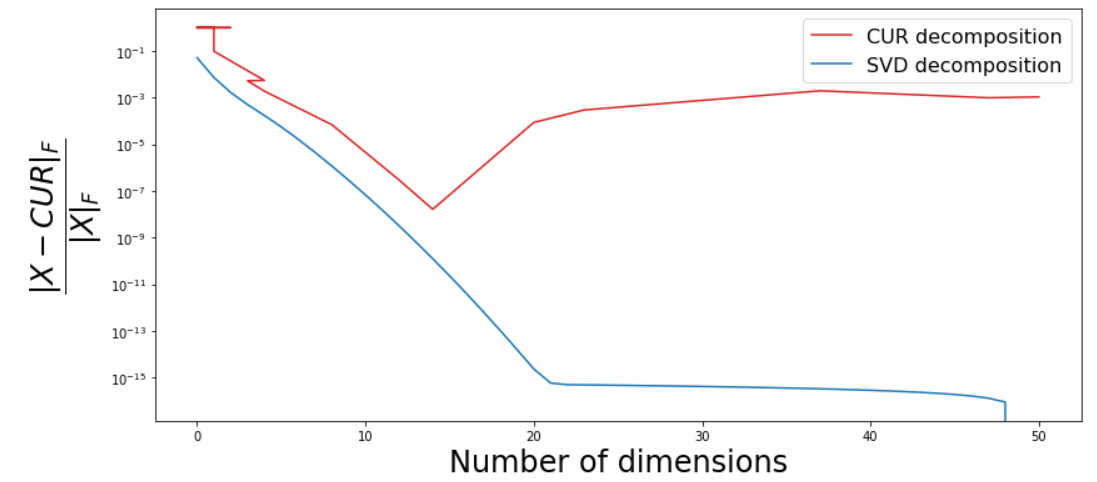

### Tests with a low-rank matrix

Let's proceed with another example - a matrix that is constructed as a sum of 10 dyads or 10 outer products of randomly generated vectors. We expect that CUR decomposition should work perfectly in this case. First we imply the stochastic algorithm.

In [6]:
ss1=100;
ss2=90;
N = 1
mults = np.linspace(1,10,N)
for i in range(N):
  s1 = int(ss1*mults[i])
  s2 = int(ss2*mults[i])
  Matrix_bra_ket = np.zeros((s1,s2))
  for j in range(10):
    a = j*np.random.rand(s1)
    b = np.random.rand(s2)
    Matrix_bra_ket = Matrix_bra_ket+(a[:,None] * b)

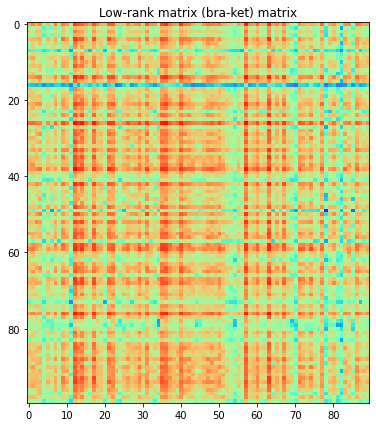

In [7]:
plt.figure(figsize=(15,7))
plt.imshow(np.log(Matrix_bra_ket), cmap='rainbow')
plt.title('Low-rank matrix (bra-ket) matrix')
plt.show()

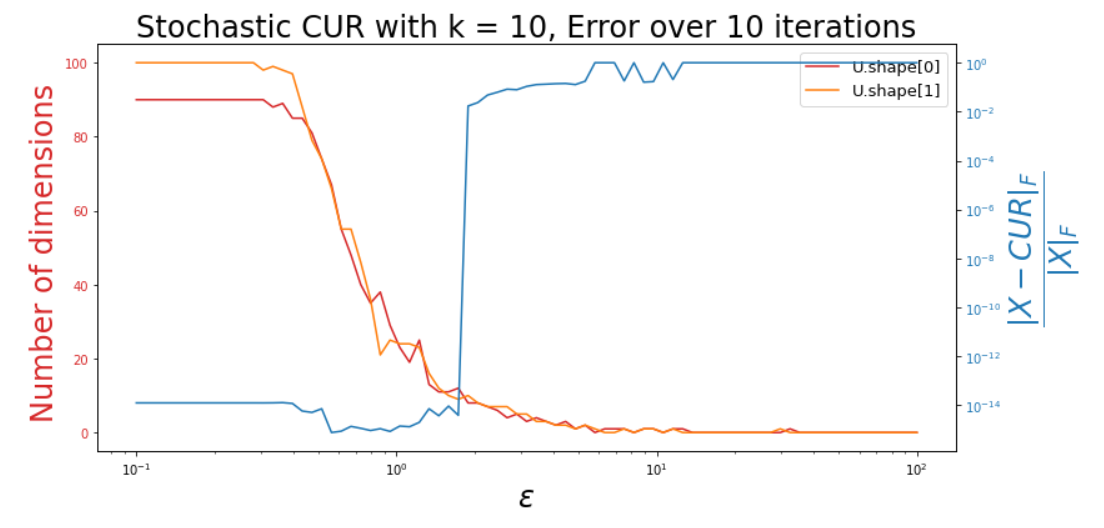

One can see that as soon as the number of chosen columns and rows reaches 10 realtive error becomes negligebly small. The comparison with SVD follows and one can see that CUR can provide the same performance and simultaneously decompose the initial matrix in the meaningfull basis.

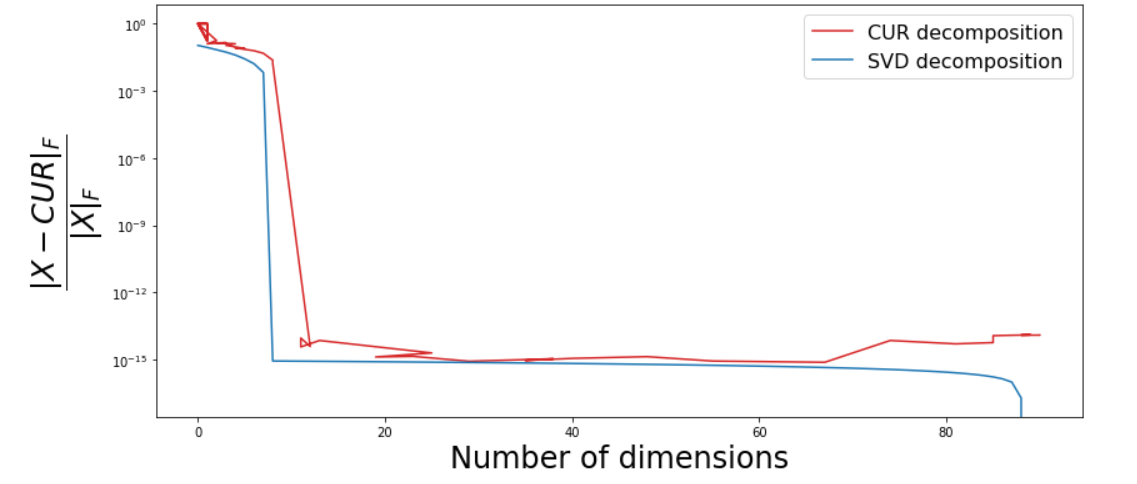

We investigate the same rank=10 matrix with the deterministic approach.

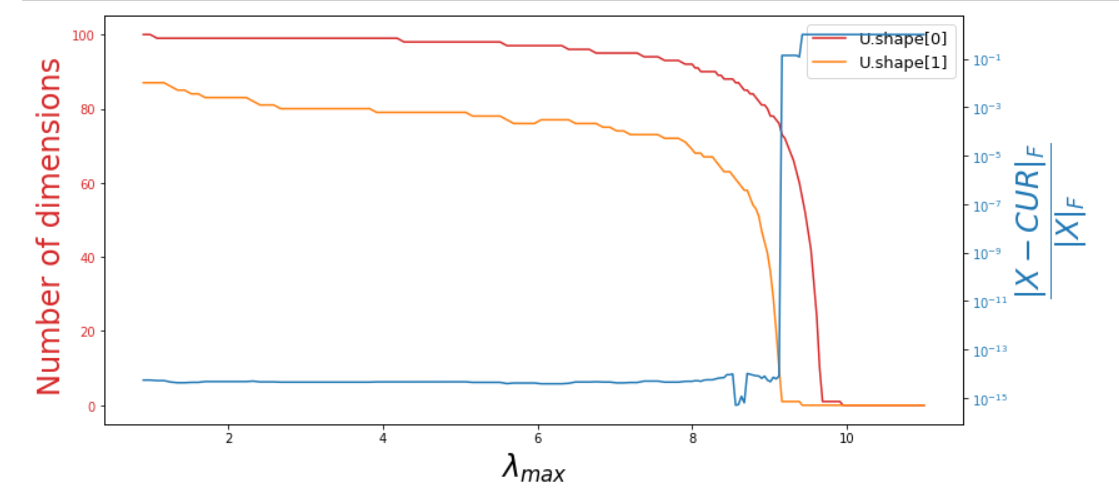

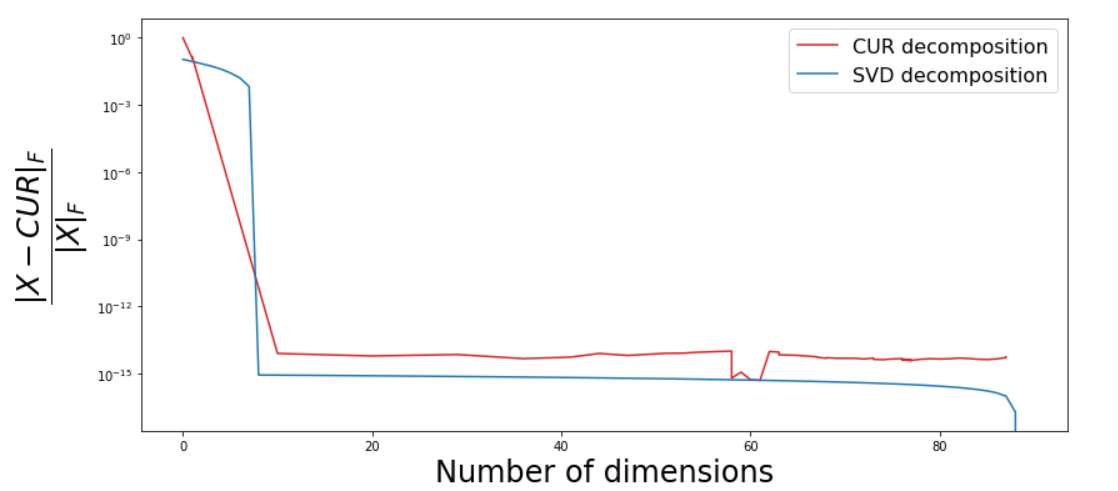

Results are also in a fine agreement with expectations. As soon as number of columns reaches 10 we are able to retrive the full matrix with perfect precision. Note that we have performed only columns selection for time reduction. Now we perform a test with a random matrix.

### Tests with a random matrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


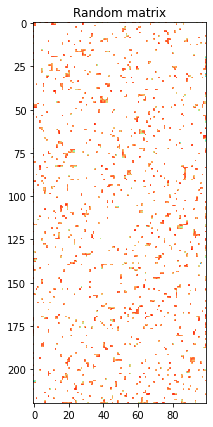

In [9]:
n = 220
p = 100
X = np.random.randn(n,p)
plt.figure(figsize=(15,7))
plt.imshow(np.log(X), cmap='rainbow')
plt.title('Random matrix')
plt.show()

Stochastic CUR for random (220,100) matrix.

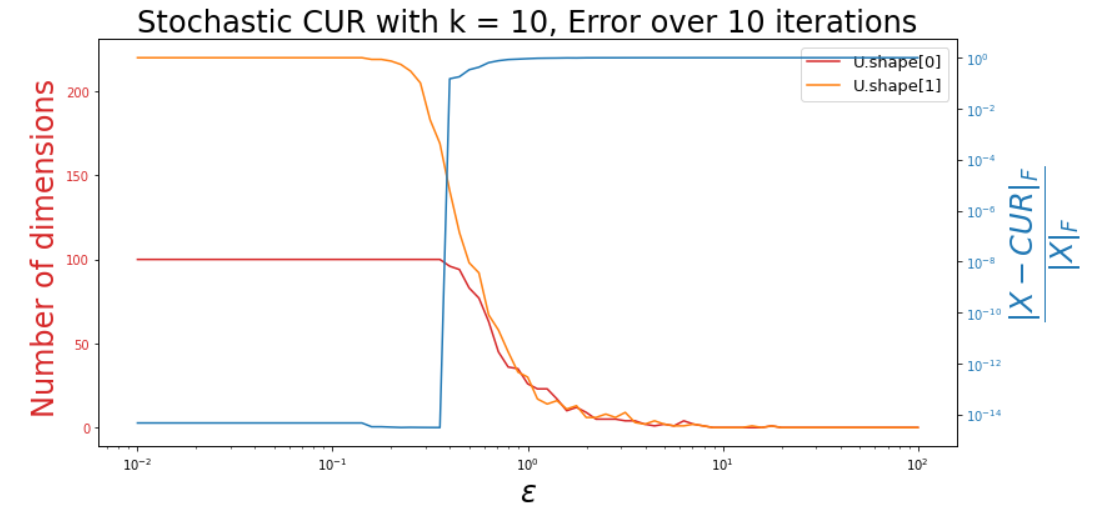

The approximation immediately converges as soon as we include all 100 columns in the approximation. This does not surpise us since the random matrix is always full rank. Later we can see the same result of the deterministic approach.

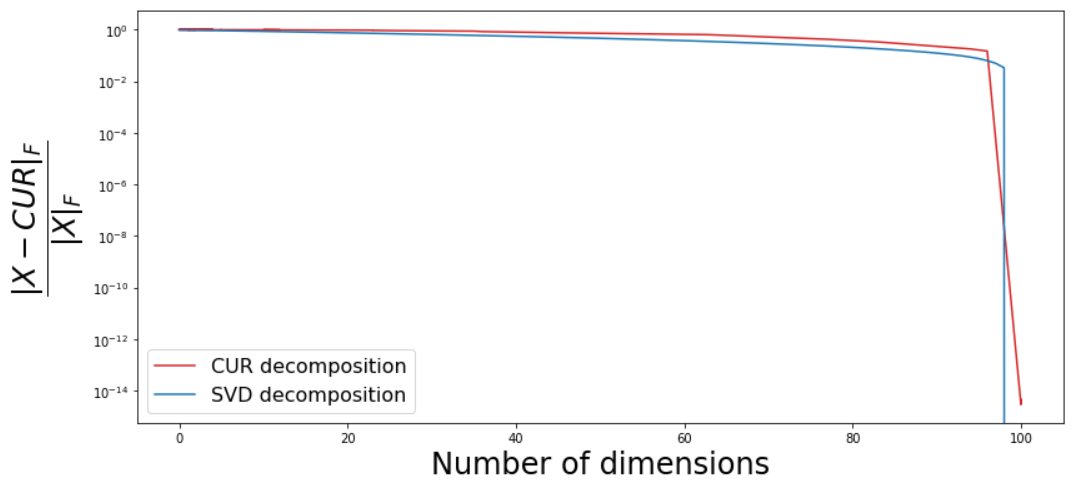

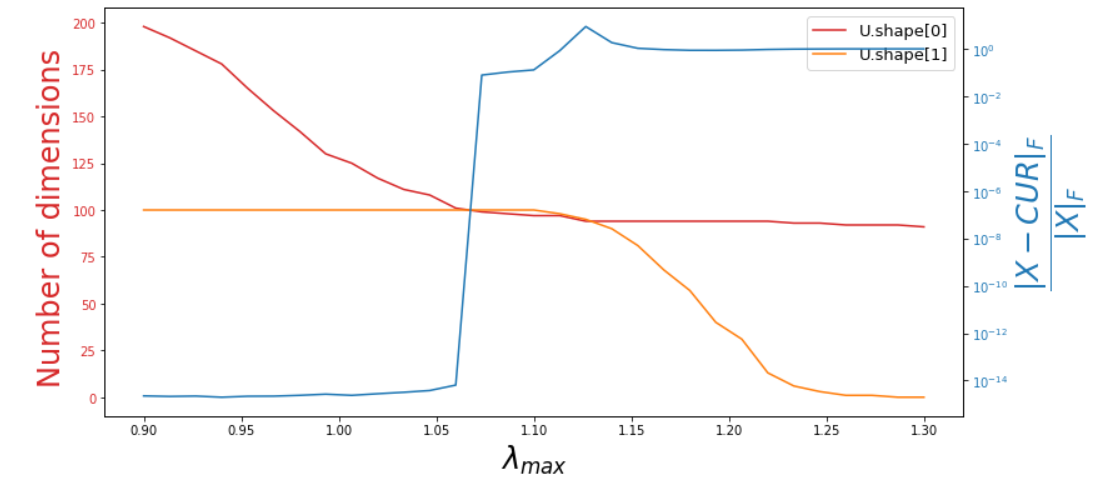

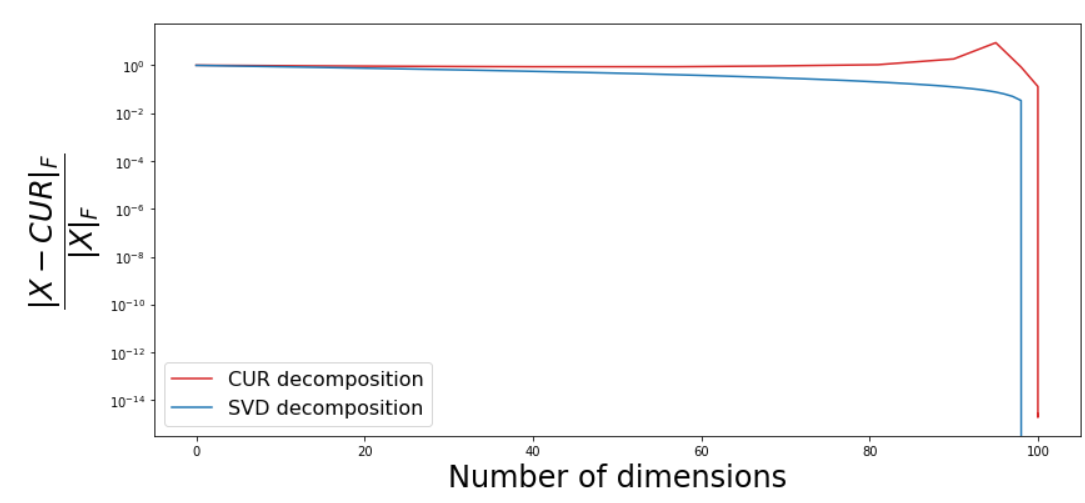

## How does it relate to SVD?

A CUR approximation is used in the same way as low-rank approximation of the singular value decomposition. In SVD decomposition:
𝐴𝑚×𝑛= 𝑈𝑚×𝑚Σ𝑚×𝑛𝑉𝐻𝑛×𝑛  $A_{m \times n} = U_{m \times m} \sum_{m \times n} V_{n \times n}$
Here, 𝑈and 𝑉 are unitary matrices of left- and right singular vectors, and Σ is a diagonal matrix containing real singular values in a descending order.
Compare that to a 𝑘-rank CUR decomposition:
𝐴𝑚×𝑛≈ 𝐶𝑚×𝑘𝑈𝑘×𝑘𝑅𝑘×𝑛 $A_{m \times n} \approx C_{m \times k} U_{k \times k} R_{k \times n}$

CUR approximations sacrifice accuracy in comparison to the SVD, but they compare favoruably in two key ways, both stemming from the fact that the rows and columns are original to the initial matrix (rather than left and right singular vectors):
There are methods to calculate it with lower asymptotic time complexity versus the SVD.
𝐶 and 𝑅 in CUR decomposition contain 𝑘 columns and 𝑘 rows of 𝐴, which means that C contains k columns of A, R contains k rows of A, and U is a k-by-k matrix.  Since rank-𝑘 CUR decomposition is not unique, different CUR decomposition will feature different rows\columns. Thus, giving an opportunity for finding more optimum parameters and reducing complexity.
The matrices are more interpretable; The meanings of rows and columns in the decomposed matrix are essentially the same as their meanings in the original matrix.
The CUR matrix approximation is often used in place of the low-rank approximation of the SVD in principal component analysis. The CUR is less accurate, but the columns of the matrix C are taken from A and the rows of R are taken from A. In PCA, each column of A contains a data sample; thus, the matrix C is made of a subset of data samples. This is much easier to interpret than the SVD's left singular vectors, which represent the data in a rotated space. Similarly, the matrix R is made of a subset of variables measured for each data sample. This is easier to comprehend than the SVD's right singular vectors, which are basically additional rotations of the data in space.
 
We can state a few factual differences between CUR and SVD: 
𝐶 and 𝑅 are not unitary in any way, as opposed to 𝑈 and 𝑉 in SVD decomposition.
𝑈 in CUR decomposition is a full 𝑘×𝑘 matrix, as opposed to a real diagonal 𝑘×𝑘 matrix Σ.
 
So, taking that into account, 𝐶 and 𝑅 in CUR decomposition follow the same properties as 𝑈 and 𝑉 in SVD decomposition. We could say that the only property that is the same between them is their dimensions (𝑚×𝑘 and 𝑘×𝑛 in the rank-𝑘 case).
Now, how can you use CUR instead of SVD. Instead of using a unique (not discussing repeating singular values) rank-𝑘 SVD decomposition, that provides you with the best rank-𝑘 approximation (in the Frobenius-norm sense), we will have to use one-of-many CUR decomposition. Depending on the purpose, we may want to choose one subset of CUR decomposition over the other, that is very problem- and algorithm dependent.


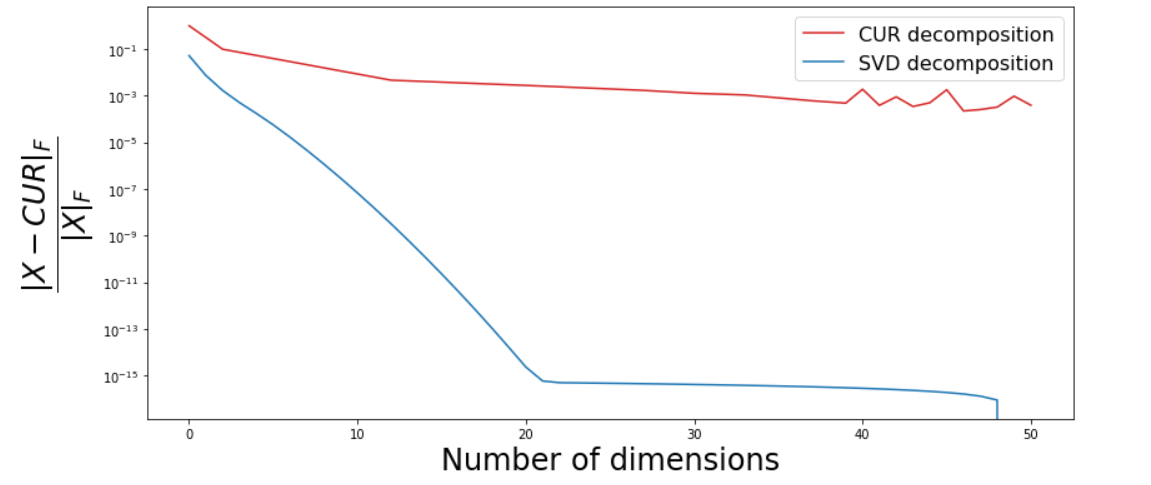

In our experiment we found that deterministic CUR doesn’t improve convergence even at full rank. This probably has to do with the type of the matrices that we were working with.

## Application of CUR Decomposition. EEG Data Filtration


Generally, the Brain Computer Interface (BCI) system is divided into three processes: preprocessing, feature extraction, and feature selection (or classification).
In the preprocessing of BCI, many techniques have been introduced such as spatial filters e.g., Independent Component Analysis (ICA), laplacian, Principal Component Analysis (PCA), Common Spatial Pattern (CSP), Linear Discriminant Analysis (LDA), etc., which are effective in extracting representative brain activity patterns.
So the signal is always a mixture of several underlying base frequencies, which are considered to reflect certain cognitive, affective, or attentional states. Whenever your brain is in a certain state, the frequency patterns change, giving insight into cognitive processes.
EEG has a few key problems:
1. Signal-to-noise ratio is poor, so sophisticated data analysis and relatively large numbers of subjects are needed to extract useful information from EEG
2. Low spatial resolution on the scalp. It requires intense interpretation just to hypothesize what areas are activated by a particular response
So, in other words, in some channels we might get noise and disturbances, which will interfere with the interpretability of results.
One of the solutions offered is called spatial selection. In general, spatial selection involves optimization of the quality of the input dataset spatial filtering process through the CUR Decomposition approach. 
And then process it with help of Common Spatial Pattern. 
In other words, make pre-pre-processing data via CUR and then pre-process it via CSP.
First step is needed because CSP as a spatial filter lacks the ability to drive the data, so it will perceive noise in absolutely empty channel as a brain signal.

After the CUR matrix component is created (estimate A matrix, C matrix, U matrix, and R matrix), the components are then used as input to the process of CSP. Its accuracy is calculated so that the components of the CUR matrix that can provide high accuracy can be determined. 
Overall, CUR pre-filtering helps to eliminate channels with excessive noise and as a result it enhances CSP and improves discriptional differentiability of brain activity areas.


**CSP without CUR Decomposition pre-processing**

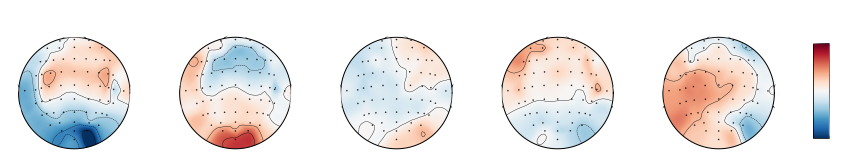

**CSP with CUR Decomposition pre-processing**

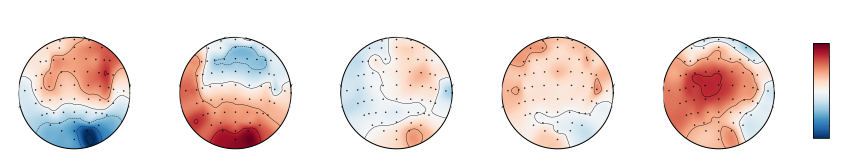

## Application of CUR Decomposition. Gene Expression

There is also an interesting way to use CUR decomposition. We considered the case of analysis of gene expression data in kidney and colon tissues. We tried to build a low-rank approximation for this dataset and compare its ability to approximate with SVD. The obtained results can be viewed as satisfying, especially considering their high interpretability.


At the plot below, we can see the level of gene expression in different samples.We can distinguish values by looking onto colors. The redder color on the plot is, the higher the value of gene expression, the bluer - the lower values of gene expression.

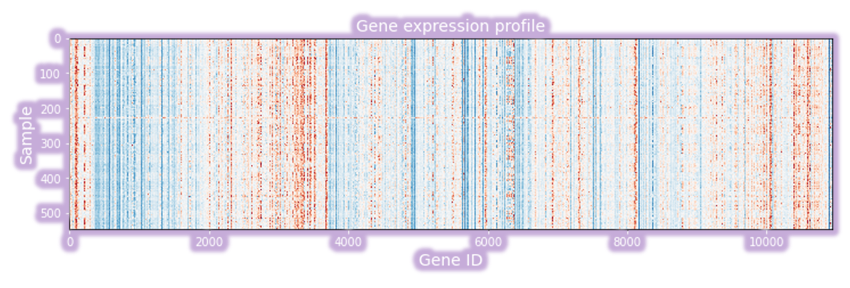

Let's looks at comparison plot. Despite of the fact, that low-rank approximation of CUR decomposition give worse result in comparison with SVD decomposition, CUR decomposition is more interpretable. Consequently, the result, that we get via CUR is more convinient for experiments.

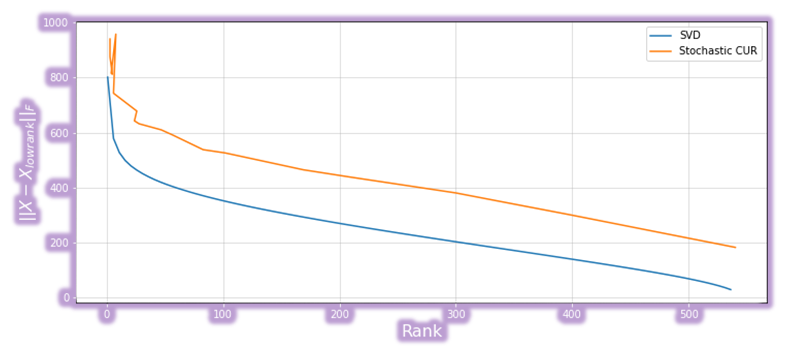

On github page you can find the code for this application and the dataset, which was used.

Github: https://github.com/NevVerVer/Fast-CUR-Decomposition

Dataset: https://www.dropbox.com/s/wpsvizetnq046h5/AP_Colon_Kidney.csv?dl=0

Notebook name: Application CUR in Gene Expressiom.ipynb

## References

1. https://proceedings.icml.cc/paper/2020/file/ 
2. fe70c36866add1572a8e2b96bfede7bf-Paper.pdf
3. https://link.springer.com/chapter/10.1007/978-981-10-6463-0_37
4. https://www.jstor.org/stable/40254734?seq=1
5. https://www.pnas.org/content/pnas/106/3/697.full.pdf
6. https://en.wikipedia.org/wiki/Singular_value_decomposition
7. https://en.wikipedia.org/wiki/CUR_matrix_approximation

- 